$$\LARGE \text{Numeri casuali}$$

Per prendere confidenza con i numeri casuali adottiamo uno dei primi e piu' semplici  algoritmi di generazione, detto **'Linear Congruential Generator'**. Si tratta di una formula ricorsiva che, a partire da un valore iniziale (detto **seed**),  costruisce una serie di numeri distribuiti casualmente nell'intervallo [0,1]:

$$ \Large X_{i+1} = (aX_i + c) \mod m $$

La prima cosa che faciamo e' quindi di preparare una function che ci permetta di realizzare la sequenza secondo la formula riportata sopra:
# definizione della funzione:

In [120]:
def generate_lcg( n_iterations, Filename=None, seed=None,a=None,\
                 c=None,m=None):
    """
    LCG -    genera tanti numeri casuali quanti richiesti in input 
             usando la formula nota come 'Linear Congruential Generator' 
             data da:
                       X_(i+1) = (aX_i + c) mod m

    INP:     a, c, m:  (int) sono parametri che condizionano il 
                       comportamento della serie estratta
             n_iterations: (int) - numero di valori da estrarre 
             Filename: (str) file in cui scrivere i numeri estratti

    OUT:     scrive la sequenza estratta in Filename
    """
    # inizializziamo le variabili
    if seed is None:             # I valori scelti come default producono 
                                 # serie di valori con qualche correlazione !
          x_value = 123456789.0  # valore di default del seed, or X_0 = 123456789
    else: x_value = seed
        
    if a is None: a = 101427     # valore di base per "a" 
    if c is None: c = 321        # valore di base per "c" 
    if m is None: m = (2 ** 16)  # valore di base per "m" 

    # inizializziamo un contatore per registrare le iterazioni fatte
    counter = 0

    # Apriamo il file in cui scriveremo i risultati (per appendere 
    # useremo "a", per riscrivere useremo "w")
    if Filename is None:
        Filename="random_numbers.txt"
        
    outFile = open(Filename, "w") # "a" per appendere

    # Procedo al numero di iterazioni richieste in input
    while counter < n_iterations:
        # Calcolo il valore in ogni iterazione
        x_value = (a * x_value + c) % m
        # riporto il valore nell'intervallo (0,1) dividendo X_i per m
        writeValue = str(x_value/m)
        # scrivi nel file di output
        outFile.write(writeValue + ",\n")
        # print "num: " + " " + str(counter) +":: " + str(x_value)

        counter = counter+1

    outFile.close()
    print("Successfully stored " + str(n_iterations) + \
          " random numbers in file named: "+Filename+".")


Il passo successivo che facciamo e' di usare la function appena definita per calcolare la serie con parametri che possono essere scelti da noi (se i valori dei parametri non vengono specificati in input, allora verranno usati i valori di default):
# produzione dei numeri

In [121]:
npoints=10000
# scelta parametri per generare numeri casuali con buone caratteristiche 
# statistiche: seed=1.508584097525E12, a=16807, c=0, m=4.294967296e9

generate_lcg(npoints,'temp.txt',seed=1.508584097525E12,a=16807 \
             ,c=0,m=4.294967296e9)

# provare ad usare la scelta dei parametri di default per evidenziare 
# qualche correlazione..... generate_lcg(npoints,'temp.txt')


Successfully stored 10000 random numbers in file named: temp.txt.


Ora la sequenza di numeri e' stato scritta in un file che si trova nella stessa directory di lavoro. Per controllare visivamente il comportamento della serie dei numeri estratti, usiamo l'istogramma dei valori che mostra come si sono distribuiti. Per ottenere l'istogramma eseguiamo le seguenti operazioni:

- leggiamo il file in cui sono scritti (vengono letti come stringhe)  
  NOTA: i valori estratti si potrebbero usare direttamente senza scriverli prima in un file. Qui abbiamo scelto di scriverli in un file al solo di imparare a farlo. Ora per usarli andiamo a rileggerli.
- trasformiamo le stringhe in numeri 'float'
- generiamo il plot con l'istogramma dei valori

## verifica della distribuzione:

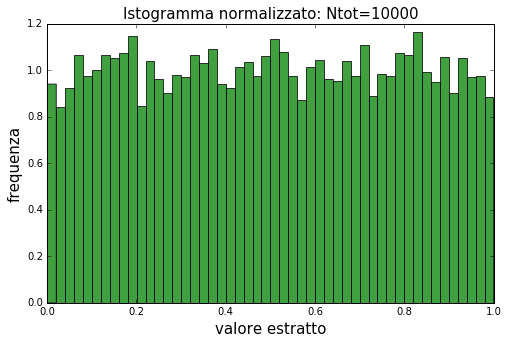

In [122]:
# 1- apri il file e leggi linea per linea
with open('temp.txt') as f:    # apriamo il file indicandolo con f 
    read_data = f.readlines()  # leggiamo linea per linea tutto il file
f.closed                       # chiudiamo il file 

# 2- read_data ora contiene tante stringhe quante sono le linee 
#    del file appena letto. Siccome ogni linea finisce con una "," 
#    la eliminiamo prima di trasformare la stringa in float
for i in range(len(read_data)):
    read_data[i]=float(read_data[i].replace(','
                                            ,''))
    
# 3- ora abbiamo numeri float e possiamo usarli 
#    per generare il loro istogramma 
plt.rcParams['figure.figsize'] = 8, 5  # dimensioni della figura    
nbin=50
plt.hist(read_data, nbin, normed=1, facecolor='green', alpha=0.75)
plt.title('Istogramma normalizzato: Ntot='+str(len(read_data)),fontsize=15)
plt.xlabel('valore estratto',fontsize=15)
plt.ylabel('frequenza',fontsize=15)

plt.show()


Con l'aiuto del grafico precedente possiamo verificare una delle qualita' che ci aspettiamo dal nostro generatore di numeri casuali: una distribuzione che dovrebbe essere tanto piu' piatta (cioe' costante su tutto l'intervallo [0-1]) quanti piu' numeri pseudo-casuali generiamo. Questo ci garantisce che non c'e' un valore preferito rispetto agli altri. 

Un'altro controllo di qualita' serve per verificare che i numeri estratti non siano correlati in qualche modo. Per valutare questo proviamo ad organizzare un grafico in cui riportiamo punti corrispondenti a coppie (x,y) che siano composte con i numeri gia' estratti. Nel produrre il grafico introduciamo anche un parametro che controlla il modo in cui formiamo le coppie (x,y): p.es potremmo usare coppie di numeri estratti uno dopo l'altro, oppure prendere coppie a tre o piu' punti di distanza.

## verifica di non-correlazione:

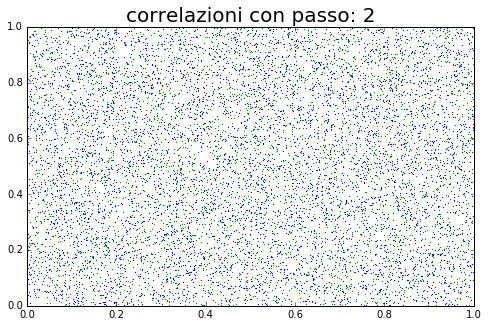

In [123]:
# Per evidenziare eventuali correlazioni in una serie di numeri {x_i}, 
# genero un grafico in cui i punti hanno coordinate X=x_i ed Y=x_i+delta
# con delta pari ad uno step che definisce il tipo di correlazione 
# (a 2 punti,a 3 punti, ...):

delta=2  # step da usare per selezionare le x e le y 
plt.rcParams['figure.figsize'] = 8, 5  # dimensioni della figura    

for i in range(delta):    
    # creo sequenze di valori modulo delta, p.es.
    # da [0,1,2,3,4,5,6,7,8,9] con delta=2 estrae: 
    # cinque coppie X,Y con X=[0,2,4,6,8]
    #                   ed  Y=[1,3,5,7,9]
    xxx=read_data[i::delta]           
    yyy=read_data[i+1::delta]          
    if len(xxx) > len(yyy): xxx=xxx[:-1]  
    if len(xxx) < len(yyy): yyy=yyy[:-1]
    plt.plot(xxx,yyy,'.',markersize=1.5)
    i += i
plt.title('correlazioni con passo: '+str(delta),fontsize=20)
plt.show()

## altri possibili test sulla duistribuzione ottenuta:
..... Sarebbe interessante aggiungere anche un altro test, p.es. quello di Kolmogorov-Smirnov, per verificare che i numeri siano effettivamente estratti da una distribuzione piatta. Provate ad implementare questo test ??? 


# Numeri casuali in Python
Ogni linguaggio di programmazione ha sviluppato propri generatori di numeri casuali. Nel caso del Python si sfrutta il generatore presente nel pacchetto "numpy" (pacchetto che contiene moltissime funzioni utili e che e' sempre consigliabile importare all'inizio di ogni sessione). Nella cella seguente troviamo una semplice estrazione di 10000 numeri compresi tra 0 ed 1 che vengono poi riportati in istogramma per verificarne la distribuzione:


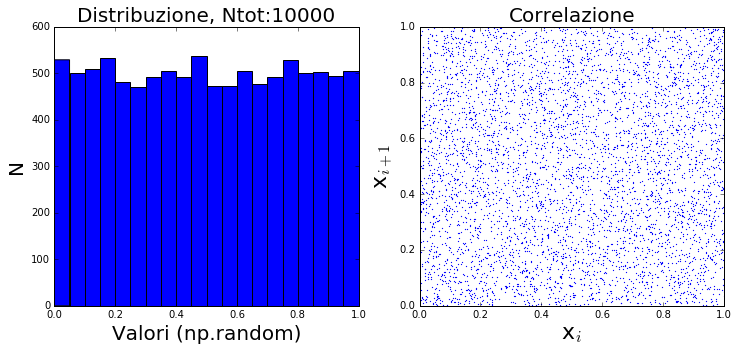

In [124]:
box=[]    # qui inizializziamo un contenitore vuoto
          # che poi riempiamo con 10000 numeri 
          # estratti con   "np.random.random()" 
for i in range(10000): box.append(np.random.random())  

# vediamo la distribuzione usando l'istogramma dei valori 
plt.rcParams['figure.figsize'] = 12, 5  # dimensioni della figura
plt.subplot(1, 2, 1)
plt.ylabel('N',fontsize=20)
plt.xlabel('Valori (np.random)',fontsize=20)
plt.title('Distribuzione, Ntot:'+str(len(box)),fontsize=20)
plt.hist(box,bins=20)   # generiamo l'istogramma dei valori contenuti in box

# verifichiamo se ci sono correlazioni indesiderate graficando 
# i valori come se fossero coordinate X ed Y di punti
i=0
xxx=box[i::delta]            # [0,2,4,6,8]
yyy=box[i+1::delta]          # [1,3,5,7]
if len(xxx) > len(yyy): xxx=xxx[:-1]  
if len(xxx) < len(yyy): yyy=yyy[:-1]
plt.subplot(1, 2, 2)
plt.plot(xxx,yyy,'.',markersize=1.5)
plt.xlabel('x$_i$',fontsize=22)
plt.ylabel('x$_{i+1}$',fontsize=22)
plt.title('Correlazione',fontsize=20)
plt.show()     # mandiamo il risultato sul display 
    

# Giocare lanciando due dadi:
Ora divertiamoci ad implementare una simulazione per valutare il comportamento che ci aspettiamo dal lancio di due dadi. Per farlo in forma di gioco vogliamo mettere a confronto le nostre stime con quelle del calcolatore. Per procedere, consideriamo tre operazioni che possiamo tradurre in termini di funzioni da definire: 
- lanciare due dadi e sommare i valori letti
- chiedere al giocatore di pronosticare il risultato
- chiedere al calcolatore di fare la stessa stima.

Le tre funzioni possono essere definite cosi':

In [52]:
import random         # importiamo il generatore di numeri casuali 

def roll_dice_and_compute_sum(ndice):
    # calcola la somma dei valori degli ndice dadi lanciati
    return sum([random.randint(1, 6) for i in range(ndice)])

def computer_guess(ndice):
    # estrae N intero casuale tale che ndice < N < 6*ndice 
    # il minimo valore che puo' uscire e' ndice
    return random.randint(ndice, 6*ndice) 

def player_guess(ndice):
    return int(input('Indovina la somma che otterrai nel prossimo '\
                 'lancio dei dadi: '))


Passiamo ora a definire la funzione di base che determina il punteggio da attribire alla stima fatta sia dal giocatore che dal calcolatore. Chiamiamo la funzione **play_one_round** che ci ricorda che verra' usata per ogni round:


In [53]:
# qui definiamo il singolo gioco
def play_one_round(ndice, capital, guess_function):
    # Qui 'guess_function' potra' essere sia 
    # 'computer_guess' che 'player_guess'

    guess = guess_function(ndice)
    throw = roll_dice_and_compute_sum(ndice)
    if guess == throw:
        capital += guess
    else:
        capital -= 1
    return capital, throw, guess


Infine scriviamo una function che mette insieme tutti i pezzi del gioco:

In [125]:
def play(nrounds, ndice=2):
    player_capital = computer_capital = nrounds
    # inizializzo il capitale con un numero di euro pari
    # al numero di giochi 'nrounds' che si faranno 

    for i in range(nrounds):
        player_capital, throw, guess = \
            play_one_round(ndice, player_capital, player_guess)
        print('Tu hai stimato %d, e` uscito %d' % (guess, throw))

        computer_capital, throw, guess = \
            play_one_round(ndice, computer_capital, computer_guess)

        print('Il computer ha stimato %d, mentre e` uscito %d' % (guess, throw))

        print('Status: tu hai %d euro, il computer ha %d euro' % \
            (player_capital, computer_capital))
        print('   ')

        if player_capital == 0 or computer_capital == 0:
            break
            
    if computer_capital > player_capital:
        winner = 'Il computer'
        print(winner, 'ha vinto!')
    elif computer_capital == player_capital:
        winner = 'Nessuno'
        print(winner, 'ha vinto!')
    elif computer_capital < player_capital:
        winner = 'Tu'
        print(winner, 'hai vinto!')


In [126]:
play(3,ndice=2)

Indovina la somma che otterrai nel prossimo lancio dei dadi: 3
Tu hai stimato 3, e` uscito 3
Il computer ha stimato 11, mentre e` uscito 2
Status: tu hai 6 euro, il computer ha 2 euro
   
Indovina la somma che otterrai nel prossimo lancio dei dadi: 3
Tu hai stimato 3, e` uscito 5
Il computer ha stimato 3, mentre e` uscito 6
Status: tu hai 5 euro, il computer ha 1 euro
   
Indovina la somma che otterrai nel prossimo lancio dei dadi: 3
Tu hai stimato 3, e` uscito 7
Il computer ha stimato 6, mentre e` uscito 5
Status: tu hai 4 euro, il computer ha 0 euro
   
Tu hai vinto!


#### Ma .... lanciando **due o piu' dadi** che distribuzione si trova ? 
Proviamo a valutarla simulando il risultato di N lanci: 
(Provate ad esplorare cosa succede aumentando il numero di dadi)

nbins usati: 14


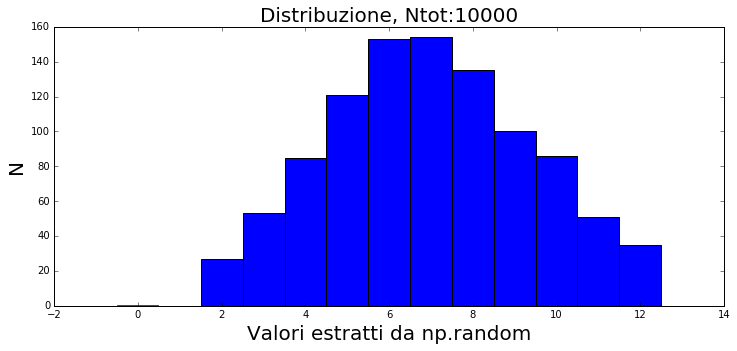

In [127]:
# Sfruttiamo la function  'roll_dice_and_compute_sum' gia' definita
a=[]       # definisco un array vuoto
N=1000     # numero di lanci 
ndadi=2
nbins=(6*ndadi)+2
for i in range(N): 
    a.append(roll_dice_and_compute_sum(ndadi))
print('nbins usati:',nbins)
plt.ylabel('N',fontsize=20)
plt.xlabel('Valori estratti da np.random',fontsize=20)
plt.title('Distribuzione, Ntot:'+str(len(box)),fontsize=20)
# generiamo l'istogramma dei valori contenuti in box
plt.hist(a,bins=range(nbins),align='left')  
plt.show()


# Numeri casuali estratti da una funzione di probabilita'
Finora abbiamo visto come sia possibile estrarre numeri pseudo-casuali che abbiano tutti la stessa identica probabilita' di essere estratti. Una situazione di questo tipo si incontra lanciando un solo dado e registrando i numeri ottenuti: il processo e' casuale ed ogni faccia ha la stessa probabilita'. Se ne lanciamo due e sommiamo i risultati delle due facce abbiamo visto che si ottiene una distribuzione triangolare piccata sul valore 7 che quindi e' il piu' probabile. Abbiamo anche visto che aumentando il numero di dadi lanciati l'istoghramma dei risultati tende a somigliare ad una distribuzione gaussiana.

Ora facciamo un passo in piu' e ci proponiamo di estrarre numeri pseudo-casuali che seguano una predefinita funzione di probabilita'. Per esempio, volendo simulare il lancio di due dadi potremmo richiedere di estrarre numeri casuali in modo tale che dopo un gran numero di estrazioni il loro accumularsi produca un istogramma di forma triangolare.  Per ottenere un risultato de genere possiamo adottare piu' startegie:
## strategia che usa il "metodo dell'inversione" (della cumulativa):
Per familiarizzare con questo metodo usiamo un esempio concreto: stiamo studiando lo spettro di una sorgente astronomica e per questo abbiamo raccolto fotoni a 6 diverse energie. Il numero di fotoni corrispondente ad ogni intervallo di energia e': in intervalli di energia otteniamo:  
          energia : 1   , 2   , 3   , 4   , 5   , 6   
          n.fotoni: 2000, 4040, 6500, 6000, 4020, 2070  

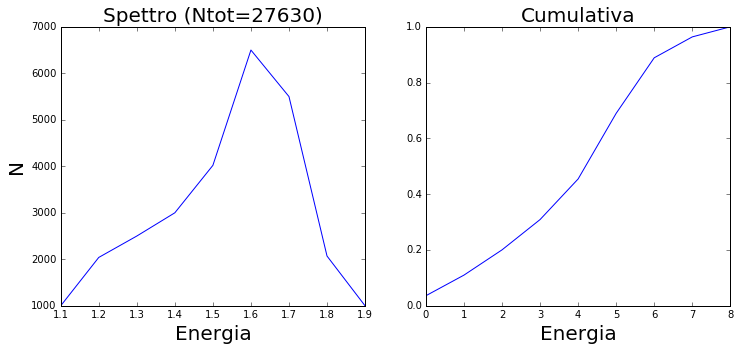

In [128]:
# raggruppiamo i dati in forma di energia e numero di fotoni raccolti 
#spectrum = [[1, 2, 3, 4, 5, 6],[2000, 4040, 6500, 6000, 4020, 2070]]
spectrum = [[1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7,1.8,1.9] \
            ,[1000, 2040, 2500, 3000, 4020, 6500,5500,2070,1000]]
# li mettiamo in due vettori che chiamiamo 'energies' e 'fluxes'
energies = np.array(spectrum[0])
fluxes   = np.array(spectrum[1])

# definiamo una funzione cumulativa: 
def cumula(data,norm=True):
    """ cumulativa di un array 
    INP : data     (array)  
          norm      True = out normalizzato ad 1
    NOTA: lo stesso risultato si ottiene usando np.cumsum(data) 
    """    
    ccc=np.zeros(len(data))  
    ccc[0]=data[0]  
    for i in range(len(data)-1):
        ccc[i+1]=ccc[i]+data[i+1]
    if norm is True: ccc=ccc/np.sum(data)
    return ccc

# calcoliamo la funzione probabilita' cumulativa :  
cum_prob=cumula(fluxes) 

plt.subplot(1, 2, 1)
plt.ylabel('N',fontsize=20)
plt.xlabel('Energia',fontsize=20)
plt.title('Spettro (Ntot='+str(np.sum(fluxes))+')',fontsize=20)
plt.plot(energies,fluxes)
#plt.hist(fluxes,bins=10)  # generiamo l'istogramma dei valori contenuti in box

plt.subplot(1,2,2)
plt.plot(cum_prob)
plt.title('Cumulativa',fontsize=20)
plt.xlabel('Energia',fontsize=20)

plt.show()

Ora che abbiamo catterizzato le nostre osservazioni ci possiamo chiedere: che distribuzione di energie avremmo ottenuto facendo solo 100 osservazioni ? e facendono 50000 ? Per rispondere proviamo a simulare le osservazioni seguendo questi passi:   
- estrarre un numero casuale 'rand' nell'intervallo [0,1];  
- riportare il valore ottenuto sull'asse y della cumulativa gia' ottenuta dai nostri dati;  
- prendere come osservazione simulata il corrispondente valore sull'asse delle x (energia). 

Quindi per ogni valore tra 0 ed 1 riportato sull'asse delle $y$ avremo un valore di energia sull'asse delle $x$. 
Con questa tecnica si privilegiano i valori di energia (asse $x$) in cui la cumulativa e' piu' ripida. Per questo a  partire da un campionamento casuale ed uniforme della $y$ viene generata una distribuzione delle $x$ non piu' uniforme, ma che rispecchia la distribuzione da cui e' stata ricavata la cumulativa. 

### Nota:
la cumulativa normalizzata per una distribuzione uniforme appare come una retta bisettrice e quindi, siccome la pendenza e' sempre la stessa, la distribuzione dei numeri estratti sulla $x$ non verra' modificata rispetto a quella di partenza sull'asse delle $y$.

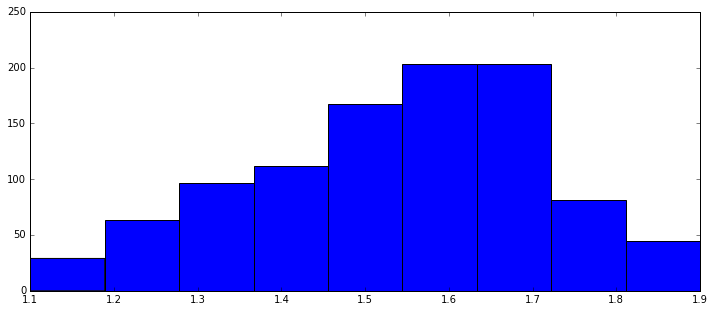

In [99]:
# simuliamo N osservazioni di fotoni raggruppandoli in intervalli 
# di energia tali da simulare le osservazioni originali: 
N = 1000                         # numero di oservazioni richiesto 
R = np.random.uniform(0, 1, N)   # genero N numeri random uniformi tra 0 ed 1 
                                 # da riportare sull'asse Y della cumulativa

# Immaginiamo i numeri in R riportati sull'asse Y della cumulativa. Proiettando 
# ora i numeri in R sull'asse X della stessa cumulativa assegniamo ad ognuno 
# l'intervallo di energia su cui ricade la proiezione. Verra' cosi' assegnato 
# ad ogni numero l'indice corrispondente all'intervallo di energia in cui ricade.
ind = np.searchsorted(cum_prob, R) 

# Ora che abbiamo individuato gli indici "ind" li usiamo per associare 
# ad ogni numero estratto in R un valore di energia corrispondente. 
ener = energies[ind]                # rappresenta i fotoni simulati 
plt.hist(ener,bins = len(energies)) # genera l'istogramma della simulazione
plt.show()


## Strategia che usa il "metodo del rigetto":  
A partire da numeri casuali estratti in modo uniforme si puo' stabilire quale accettare e quale rigettare (da cui il nome del metodo) utilizzando un criterio calibrato sulla funzione di probabilita' che si vuole riprodurre a partire da estrazioni casuali.  

Qui adottiamo la strategia dell'eliminazione per generare numeri casuali la cui distribuzione di probabilita' approssima una forma analitica gia' nota.  
http://code.activestate.com/recipes/577264-random-numbers-with-arbitrary-probability-distribu/


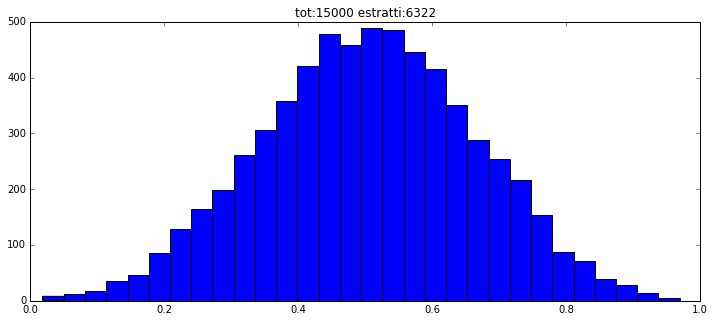

In [118]:
# Se la densita' di probabilita' da cui estrarre valori a caso e' 
# nota analiticamente:  
# 0) consideriamo la parte del piano cartesiano che contiene la funzione 
#    che vogliamo riprodurre: la base sia la regione da cui vogliamo 
#    estrarre le x e l'altezza sia la differenza tra max e min della 
#    funzione entro la base. Questo e' un rettangolo entro cui:
# 1) generiamo due numeri random da una distribuzione uniforme;
# 2) "scaliamo" x ed y sulla base ed altezza del rettangolo predefinito al 
#    punto precedente;
# 3) calcoliamo il valore della funzione f(x) nello stesso punto x=x_scalato 
#    e confrontiamolo con il valore di y gia' scalato; 
# 4) se f(x) > y_scalato allora la x estratta dalla distribuzine uniforme 
#    viene rigettata, altrimenti viene accettata.

import math
import random

# definiamo la funzione che si vuole riprodurre 
# (provate poi a variare la forma funzionale)
def f(x):
    # f(x) = 1.0 : pdf (distribuzione) uniforme 
    # f(x) = x   : pdf linearmente crescente 
    # f(x) = math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi) # Gaussiana con sigma=2
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi) 
    #    return math.sin(x)      # pdf seno 

    # f(x) = x per X<0.5, f(x)=1-x per x>0.5   : pdf triangolare
    #if  x <0.5 : return x    # triangolare
    #if  x>=0.5 : return 1-x  # triangolare


# definiamo qui l'intervallo [xmin,xmax] di variabilita' della x (xmin < xmax)
xmin = -3.0
xmax = 3. #math.pi

# ora cerchiamo il minimo e massimo della y(x) per xmin < x < xmax  
numSteps = 100000 # dividiamo l'intervallo in un gran numero di passi!
ymin = f(xmin)
ymax = ymin
for i in range(numSteps):
    # questo ciclo esplora la funzione di probabilita' f(x) 
    # nell'intervallo in cui vogliamo campionare per trovare 
    # i valori di massimo e minimo
    x = xmin + (xmax - xmin) * float(i) / numSteps
    y = f(x)
    if y < ymin: ymin = y   # cerca il minimo della funzione 
    if y > ymax: ymax = y   # cerca il massimo 

n = 15000  # how many random numbers to generate
arr=[]    # contenitore per i valori accettati 
xextr=[]  # tutte le x estratte 
yextr=[]  # tutte le y estratte 
esito=[]  # esiti dell'estrazione: accettato: 1, rigettato: 0
count=0
for i in range(n):
    # 
    while True:
        # genera un numero casuale tra 0 ed 1
        xr = random.random()
        yr = random.random()
        # estraggo una coppia (x,y) da una distribuzione uniforme 
        # entro gli intervalli delle x ed y definiti prima:
        x = xmin + (xmax - xmin) * xr
        y = ymin + (ymax - ymin) * yr
        # ora calcolo la f(x) alla x prescelta e confronto il valore 
        # con quello ottenuto nell'estrazione uniforme precedente:
        xextr.append(xr)
        yextr.append(yr)
        if y <= f(x):
            # se la y estratta e' minore della funzione, allora e' OK
            arr.append(xr)
            esito.append(1)
            count = count+1
            break
        else: 
            esito.append(0)
            break

# vado a verificare con un istogramma la forma ottenuta con il campionamento
plt.hist(arr,bins=30)
plt.title('tot:'+str(n)+' estratti:'+str(count)) 
plt.show()


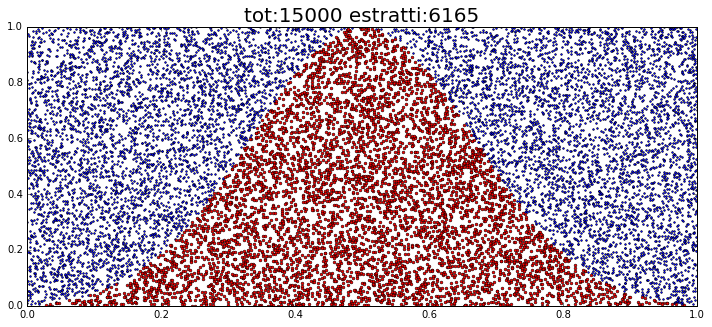

In [116]:
xextr=np.array(xextr)
yextr=np.array(yextr)
esito=np.array(esito)
plt.title('tot:'+str(n)+' estratti:'+str(count), fontsize=20) 
plt.plot(xextr[esito<1],yextr[esito<1],'bo',markersize=1.8)
plt.plot(xextr[esito>0],yextr[esito>0],'ro',markersize=2.8)
plt.show()